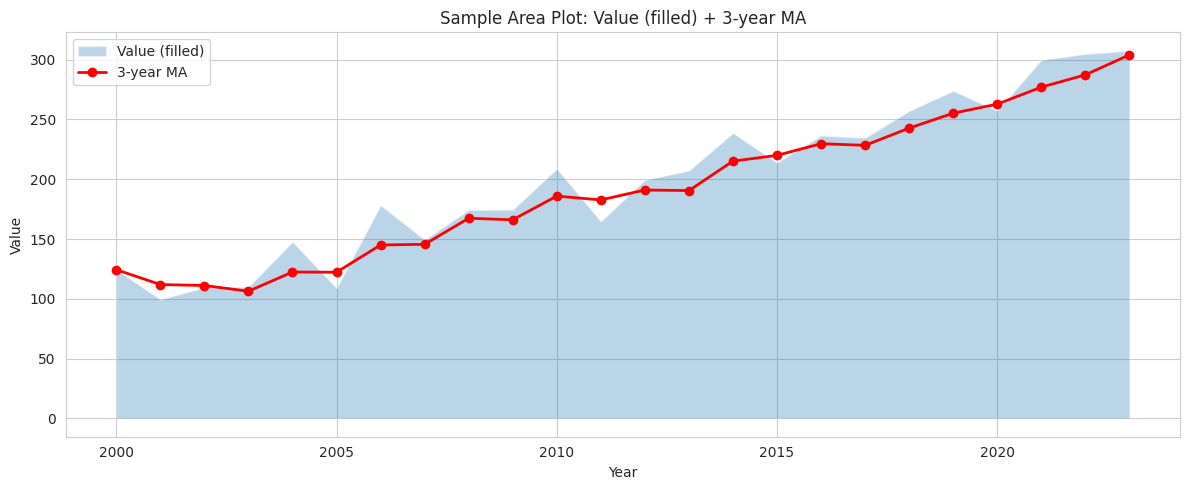

In [ ]:
# Area plot sample
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12,5)

# Sample data: years 2000-2023
years = pd.date_range('2000-01-01', periods=24, freq='YS')
np.random.seed(1)
base = np.linspace(100, 300, len(years))            # upward trend
noise = np.random.normal(scale=15, size=len(years))
values = base + noise

df = pd.DataFrame({'date': years, 'value_filled': values}).set_index('date')
df['ma_3'] = df['value_filled'].rolling(window=3, min_periods=1).mean()

# Plot: filled area + MA line
x = df.index.year
plt.fill_between(x, df['value_filled'], alpha=0.3, label='Value (filled)')
plt.plot(x, df['ma_3'], color='red', marker='o', label='3-year MA', linewidth=2)
plt.title('Sample Area Plot: Value (filled) + 3-year MA')
plt.xlabel('Year'); plt.ylabel('Value')
plt.legend(); plt.grid(True); plt.tight_layout()
plt.show()


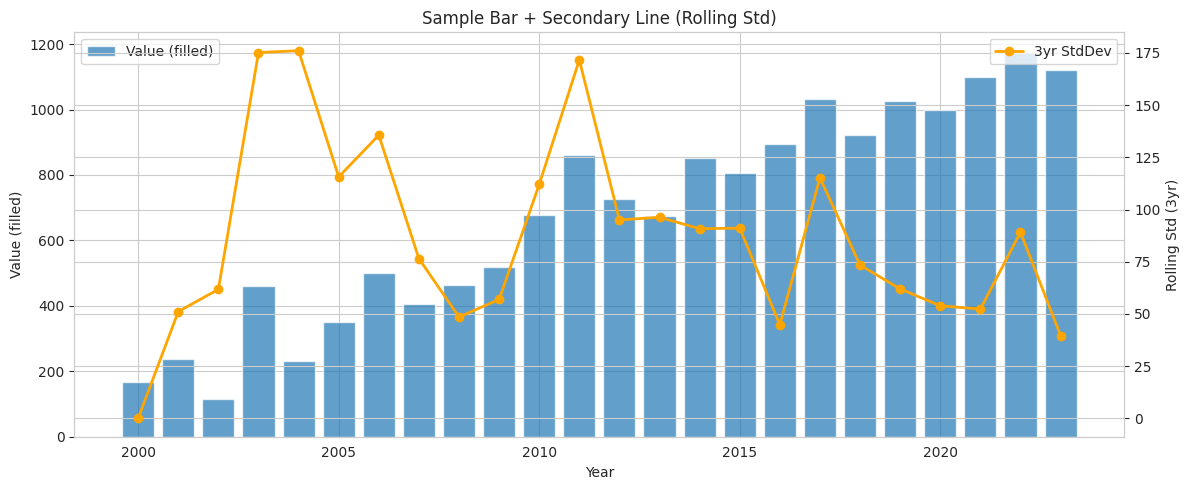

In [ ]:
# Bar + secondary line (rolling std) sample
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12,5)

# Sample data: years 2000-2023
years = pd.date_range('2000-01-01', periods=24, freq='YS')
np.random.seed(2)
vals = np.linspace(200, 1200, len(years)) + np.random.normal(scale=80, size=len(years))
df = pd.DataFrame({'date': years, 'value_filled': vals}).set_index('date')
df['rolling_std_3'] = df['value_filled'].rolling(window=3, min_periods=1).std().fillna(0)

x = df.index.year

fig, ax1 = plt.subplots(figsize=(12,5))
ax1.bar(x, df['value_filled'], label='Value (filled)', alpha=0.7)
ax1.set_xlabel('Year'); ax1.set_ylabel('Value (filled)')
ax2 = ax1.twinx()
ax2.plot(x, df['rolling_std_3'], color='orange', marker='o', label='3yr StdDev', linewidth=2)
ax2.set_ylabel('Rolling Std (3yr)')
ax1.set_title('Sample Bar + Secondary Line (Rolling Std)')
ax1.legend(loc='upper left'); ax2.legend(loc='upper right')
plt.tight_layout(); plt.show()


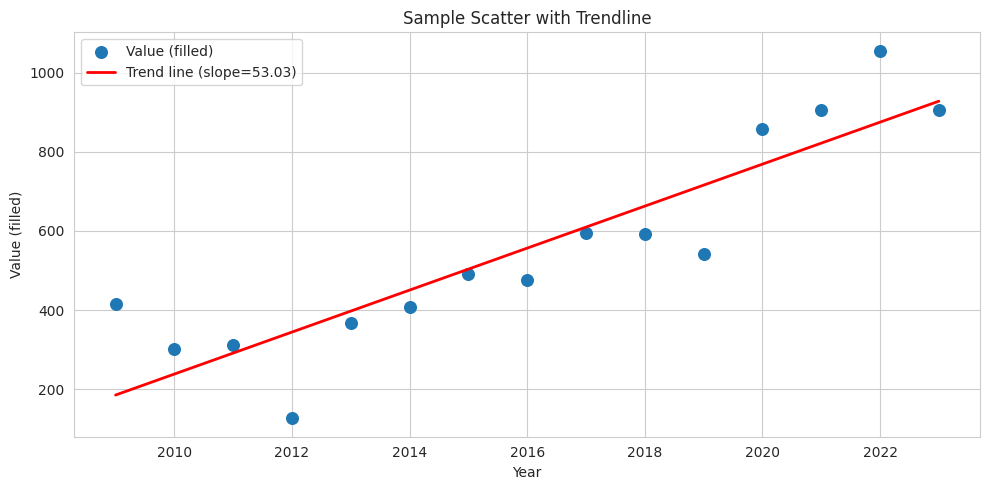

In [ ]:
# Scatter + trendline sample
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,5)

# Sample data: years 2009-2023 (to mirror problem B)
years = pd.date_range('2009-01-01', periods=15, freq='YS')
np.random.seed(3)
vals = 50 * np.arange(len(years)) + 200 + np.random.normal(scale=120, size=len(years))  # increasing trend + noise

df = pd.DataFrame({'date': years, 'value_filled': vals}).set_index('date')
x = df.index.year.values
y = df['value_filled'].values

plt.scatter(x, y, label='Value (filled)', s=70)
# Fit simple linear regression (degree=1)
mask = ~np.isnan(y)
if mask.sum() >= 2:
    slope, intercept = np.polyfit(x[mask], y[mask], 1)
    trend_y = slope * x + intercept
    plt.plot(x, trend_y, color='red', linewidth=2, label=f'Trend line (slope={slope:.2f})')

plt.title('Sample Scatter with Trendline')
plt.xlabel('Year'); plt.ylabel('Value (filled)')
plt.legend(); plt.grid(True); plt.tight_layout()
plt.show()


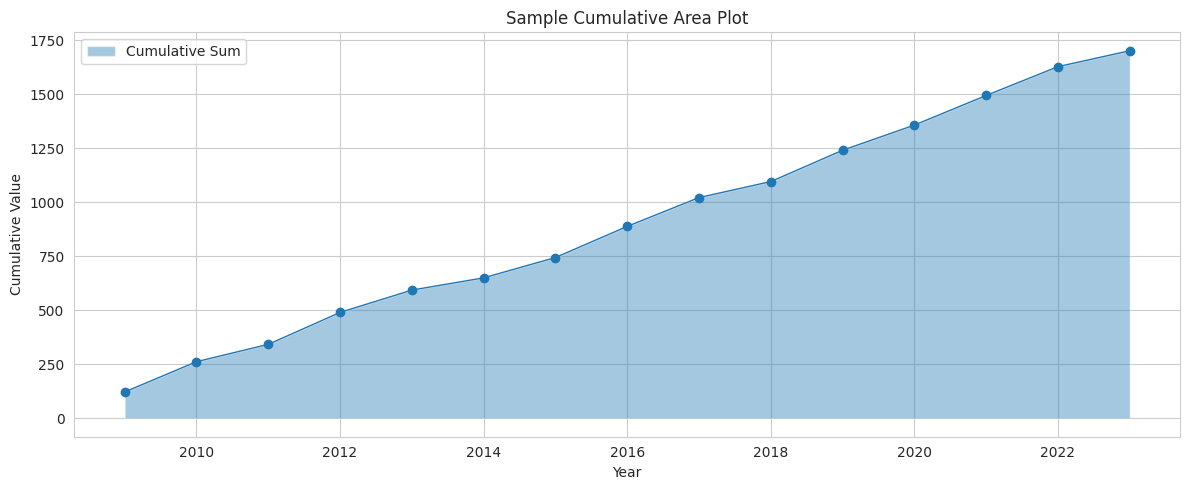

In [1]:
# Cumulative area plot sample
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12,5)

# Sample data: years 2009-2023
years = pd.date_range('2009-01-01', periods=15, freq='YS')
np.random.seed(4)
vals = np.random.normal(loc=100, scale=40, size=len(years))  # yearly increments (could be positives/negatives)
# Make mostly positive to illustrate cumulative growth
vals = np.abs(vals) + 20
df = pd.DataFrame({'date': years, 'value_filled': vals}).set_index('date')
df['cumsum'] = df['value_filled'].cumsum()

x = df.index.year
plt.fill_between(x, df['cumsum'], alpha=0.4, label='Cumulative Sum')
plt.plot(x, df['cumsum'], marker='o', linewidth=1)
plt.title('Sample Cumulative Area Plot')
plt.xlabel('Year'); plt.ylabel('Cumulative Value')
plt.legend(); plt.grid(True); plt.tight_layout()
plt.show()
